# Imports

In [1]:
import os

import pandas as pd
import scanpy as sc
sc.logging.print_versions()
sc.logging.print_header()

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             4.7.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.2
ptyprocess          0.6.0
pyg

## Instructions from Camille

1. Cross_species_unified_annotations_Lung_Muscle_Blood.xlsx where you can see the updated unified annotations (I tried my best to look for any typos!!)
1. tabula-muris-senis_10X_Limb_Muscle_updated-annotations.h5ad
    1. Olga please remove 1 and 3 month old data
    1. ***Note there are only 5 slow muscle cells in the TMS data, so depending on your cutoff Olga for minimum number of cells, we might not be able to compare slow vs fast muscle cells. 
1. tabula-sapiens_P1P2_10X_SS2_Muscle_updated-annotations.h5ad
    1. This is only p1 and p2. Olga please remove diaphragm data from P2 and all the SmartSeq2 data.
    1. Antoine under 'Anatomical information' for P2 there is: rectus, diaphragm and 'nan'. Not sure what 'nan' refers to in that case. But it's all smartseq2 so it will removed. 

In [3]:
h5ad = '/home/olga/data_lg/data_sm_copy/tabula-sapiens/data-objects/Pilot1_Pilot2_decontX_Oct2020.h5ad'
sapiens = sc.read(h5ad, cache=True)
sapiens

AnnData object with n_obs × n_vars = 149345 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_metho

In [4]:
sapiens.obs.method.unique()

['10X', 'smartseq2']
Categories (2, object): ['10X', 'smartseq2']

## Subset to 10x

In [5]:
sapiens_10x = sapiens[sapiens.obs.method == "10X"]
sapiens_10x

View of AnnData object with n_obs × n_vars = 136915 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'don

Trying to set attribute `.uns` of view, copying.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


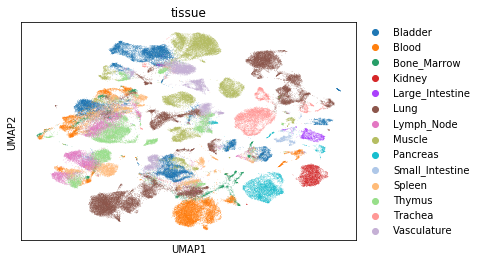

In [6]:
sc.pl.umap(sapiens_10x, color='tissue')

## Remove diaphragm from pilot 2

In [7]:
diaphgram_pilot2 = (sapiens_10x.obs.anatomical_position == "diaphragm") & (sapiens_10x.obs.donor == "TSP2")
print(diaphgram_pilot2.sum())

sapiens_10x_no_diaphragm_pilot2 = sapiens_10x[~diaphgram_pilot2]
sapiens_10x_no_diaphragm_pilot2

4031


View of AnnData object with n_obs × n_vars = 132884 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'don

### Create unified "individual"

In [8]:
individual_mapper = {"TSP1": 'human_tsp_1', 'TSP2': "human_tsp_2"}

sapiens_10x_no_diaphragm_pilot2.obs['individual'] = sapiens_10x_no_diaphragm_pilot2.obs.donor.map(individual_mapper)
sapiens_10x_no_diaphragm_pilot2.obs['individual'].value_counts()

Trying to set attribute `.obs` of view, copying.


human_tsp_2    100995
human_tsp_1     31889
Name: individual, dtype: int64

## Use minimal columns for `.obs` (cell metadata)

### Subset to minimal obs columns

In [9]:
obs_cols = [
    "individual",
    "tissue",
    "anatomical_position",
    "X10X_barcode",
    "X10X_run",
    "sex",
    "n_counts",
    "n_genes",
    "cell_ontology_type",
]

minimal_obs = sapiens_10x_no_diaphragm_pilot2.obs[obs_cols]
minimal_obs['age'] = '50-59y'
minimal_obs.head()

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,individual,tissue,anatomical_position,X10X_barcode,X10X_run,sex,n_counts,n_genes,cell_ontology_type,age
index,,,,,,,,,,
AAACCCAGTGTAGCAG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCAGTGTAGCAG,TSP1_bladder_1,female,5522.0,1908,macrophage,50-59y
AAACCCATCAAGTCTG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCAAGTCTG,TSP1_bladder_1,female,3829.0,1473,macrophage,50-59y
AAACCCATCCTTCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCCTTCGAC,TSP1_bladder_1,female,6434.0,2062,macrophage,50-59y
AAACCCATCGAAGGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCGAAGGAC,TSP1_bladder_1,female,12273.0,2751,macrophage,50-59y
AAACGAAAGCTCCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACGAAAGCTCCGAC,TSP1_bladder_1,female,4724.0,651,plasma cell,50-59y


### Rename obs columns

In [10]:
minimal_obs = minimal_obs.rename(
    columns={
        "X10X_barcode": "cell_barcode",
        "X10X_run": "channel",
        "anatomical_position": "subtissue",
        "cell_ontology_type": "cell_ontology_class",
        "n_counts": "n_counts",
        "n_genes": "n_genes",
        "sex": "sex",
        "tissue": "tissue",
    }
)
minimal_obs.head()

,individual,tissue,subtissue,cell_barcode,channel,sex,n_counts,n_genes,cell_ontology_class,age
index,,,,,,,,,,
AAACCCAGTGTAGCAG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCAGTGTAGCAG,TSP1_bladder_1,female,5522.0,1908,macrophage,50-59y
AAACCCATCAAGTCTG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCAAGTCTG,TSP1_bladder_1,female,3829.0,1473,macrophage,50-59y
AAACCCATCCTTCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCCTTCGAC,TSP1_bladder_1,female,6434.0,2062,macrophage,50-59y
AAACCCATCGAAGGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCGAAGGAC,TSP1_bladder_1,female,12273.0,2751,macrophage,50-59y
AAACGAAAGCTCCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACGAAAGCTCCGAC,TSP1_bladder_1,female,4724.0,651,plasma cell,50-59y


### Add species

In [11]:
minimal_obs['species'] = "Human"
minimal_obs['species_latin'] = 'Homo sapiens'
minimal_obs.head()

,individual,tissue,subtissue,cell_barcode,channel,sex,n_counts,n_genes,cell_ontology_class,age,species,species_latin
index,,,,,,,,,,,,
AAACCCAGTGTAGCAG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCAGTGTAGCAG,TSP1_bladder_1,female,5522.0,1908,macrophage,50-59y,Human,Homo sapiens
AAACCCATCAAGTCTG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCAAGTCTG,TSP1_bladder_1,female,3829.0,1473,macrophage,50-59y,Human,Homo sapiens
AAACCCATCCTTCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCCTTCGAC,TSP1_bladder_1,female,6434.0,2062,macrophage,50-59y,Human,Homo sapiens
AAACCCATCGAAGGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCGAAGGAC,TSP1_bladder_1,female,12273.0,2751,macrophage,50-59y,Human,Homo sapiens
AAACGAAAGCTCCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACGAAAGCTCCGAC,TSP1_bladder_1,female,4724.0,651,plasma cell,50-59y,Human,Homo sapiens


## Use minimum columns for `.var` (gene metadata)

In [12]:
sorted(sapiens_10x_no_diaphragm_pilot2.var.columns)

['contamination_prop-0',
 'contamination_prop-1',
 'contamination_prop-10',
 'contamination_prop-11',
 'contamination_prop-12',
 'contamination_prop-13',
 'contamination_prop-14',
 'contamination_prop-2',
 'contamination_prop-3',
 'contamination_prop-4',
 'contamination_prop-5',
 'contamination_prop-6',
 'contamination_prop-7',
 'contamination_prop-8',
 'contamination_prop-9',
 'ensembl_id',
 'feature_types.0.0',
 'feature_types.0.0.0.1',
 'gene_symbol.0.0',
 'gene_symbol.0.0.0.1',
 'len',
 'n_cells',
 'n_cells.0',
 'n_cells.0.0',
 'n_cells.1.0',
 'n_cells.1.0.0.1',
 'n_cells.1.0.1',
 'n_cells.1.1']

In [13]:
var_cols = ['ensembl_id', 'len',]

new_var = sapiens_10x_no_diaphragm_pilot2.var[var_cols]
new_var.head()

,ensembl_id,len
DDX11L1,ENSG00000223972.5,1144.5
WASH7P,ENSG00000227232.5,1351.0
MIR6859-1,ENSG00000278267.1,68.0
MIR1302-2HG,ENSG00000243485.5,623.5
MIR1302-2,ENSG00000284332.1,138.0


# Add unified annotations

## Blood

In [15]:
import unified_annotations

blood_grouping = unified_annotations.get_celltype_converter(
    "Blood", ("Human", "Tabula Sapiens", "cell_ontology_type")
) 
blood_grouping = blood_grouping.drop('tissue', axis=1)
print(blood_grouping.shape)
blood_grouping.head()

(25, 3)


,narrow_group,broad_group,compartment_group
"(Human, Tabula Sapiens, cell_ontology_type)",,,
B cell,B cell,B cell,lymphoid
immature B cell,B cell,B cell,lymphoid
memory B cell,B cell,B cell,lymphoid
naive B cell,B cell,B cell,lymphoid
plasma cell,plasma cell,plasma cell,lymphoid


## Muscle

In [16]:
muscle_grouping = unified_annotations.get_celltype_converter(
    "Muscle",
    (
        "Human",
        "Tabula Sapiens",
        "TS_muscle_CE_free_annotation (P1 and P2, remove diaphragm data AND remove SS2 data)",
    ),
)
muscle_grouping = muscle_grouping.drop('tissue', axis=1)
print(muscle_grouping.shape)
muscle_grouping.head()

(34, 3)


,narrow_group,broad_group,compartment_group
"(Human, Tabula Sapiens, TS_muscle_CE_free_annotation (P1 and P2, remove diaphragm data AND remove SS2 data))",,,
B cell,B cell,B cell,lymphoid
plasma cell,plasma cell,plasma cell,lymphoid
T cell (CD4+ CD8-),T cell (CD4+),T cell,lymphoid
T cell (CD4- CD8+),T cell (CD8+),T cell,lymphoid
natural killer cell,natural killer cell,natural killer cell,lymphoid


## Concatenate muscle and blood since both use `cell_ontology_type`

In [17]:
blood_muscle = pd.concat([blood_grouping, muscle_grouping])
blood_muscle = blood_muscle.loc[~blood_muscle.index.duplicated()]
blood_muscle.head()

,narrow_group,broad_group,compartment_group
B cell,B cell,B cell,lymphoid
immature B cell,B cell,B cell,lymphoid
memory B cell,B cell,B cell,lymphoid
naive B cell,B cell,B cell,lymphoid
plasma cell,plasma cell,plasma cell,lymphoid


### Merge new renamed, minimal obs with blood muscle for `narrow_group`, `broad_group`

In [18]:
minimal_obs_with_groupings = minimal_obs.merge(
    blood_muscle, how="left", left_on="cell_ontology_class", right_index=True
)
# minimal_obs_with_groupings.index = minimal_obs_with_groupings.index.astype(str)
print(minimal_obs_with_groupings.shape)
minimal_obs_with_groupings.head()

(132884, 15)


,individual,tissue,subtissue,cell_barcode,channel,sex,n_counts,n_genes,cell_ontology_class,age,species,species_latin,narrow_group,broad_group,compartment_group
index,,,,,,,,,,,,,,,
AAACCCAGTGTAGCAG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCAGTGTAGCAG,TSP1_bladder_1,female,5522.0,1908,macrophage,50-59y,Human,Homo sapiens,macrophage,macrophage,myeloid
AAACCCATCAAGTCTG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCAAGTCTG,TSP1_bladder_1,female,3829.0,1473,macrophage,50-59y,Human,Homo sapiens,macrophage,macrophage,myeloid
AAACCCATCCTTCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCCTTCGAC,TSP1_bladder_1,female,6434.0,2062,macrophage,50-59y,Human,Homo sapiens,macrophage,macrophage,myeloid
AAACCCATCGAAGGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCGAAGGAC,TSP1_bladder_1,female,12273.0,2751,macrophage,50-59y,Human,Homo sapiens,macrophage,macrophage,myeloid
AAACGAAAGCTCCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACGAAAGCTCCGAC,TSP1_bladder_1,female,4724.0,651,plasma cell,50-59y,Human,Homo sapiens,plasma cell,plasma cell,lymphoid


## Convert bytes to strings

In [19]:
minimal_obs_with_groupings.dtypes

individual             category
tissue                 category
subtissue              category
cell_barcode           category
channel                category
sex                    category
n_counts                float64
n_genes                   int64
cell_ontology_class      object
age                      object
species                  object
species_latin            object
narrow_group             object
broad_group              object
compartment_group        object
dtype: object

# Add new metadata

In [20]:
! hostname

ndnd


In [21]:
var_cols_to_drop = sapiens_10x_no_diaphragm_pilot2.var.columns.difference(new_var.columns)
var_cols_to_drop

Index(['contamination_prop-0', 'contamination_prop-1', 'contamination_prop-10',
       'contamination_prop-11', 'contamination_prop-12',
       'contamination_prop-13', 'contamination_prop-14',
       'contamination_prop-2', 'contamination_prop-3', 'contamination_prop-4',
       'contamination_prop-5', 'contamination_prop-6', 'contamination_prop-7',
       'contamination_prop-8', 'contamination_prop-9', 'feature_types.0.0',
       'feature_types.0.0.0.1', 'gene_symbol.0.0', 'gene_symbol.0.0.0.1',
       'n_cells', 'n_cells.0', 'n_cells.0.0', 'n_cells.1.0', 'n_cells.1.0.0.1',
       'n_cells.1.0.1', 'n_cells.1.1'],
      dtype='object')

In [22]:
new_var

,ensembl_id,len
DDX11L1,ENSG00000223972.5,1144.5
WASH7P,ENSG00000227232.5,1351.0
MIR6859-1,ENSG00000278267.1,68.0
MIR1302-2HG,ENSG00000243485.5,623.5
MIR1302-2,ENSG00000284332.1,138.0
...,...,...
MT-ND6,ENSG00000198695.2,525.0
MT-TE,ENSG00000210194.1,69.0
MT-CYB,ENSG00000198727.2,1141.0
MT-TT,ENSG00000210195.2,66.0


In [23]:
# new_var.index = new_var.index.str.decode('utf-8')
# new_var['ensembl_id'] = new_var['ensembl_id'].str.decode('utf-8')
new_var.head()

,ensembl_id,len
DDX11L1,ENSG00000223972.5,1144.5
WASH7P,ENSG00000227232.5,1351.0
MIR6859-1,ENSG00000278267.1,68.0
MIR1302-2HG,ENSG00000243485.5,623.5
MIR1302-2,ENSG00000284332.1,138.0


In [24]:
sapiens_10x_no_diaphragm_pilot2.var = new_var
sapiens_10x_no_diaphragm_pilot2.var.head()

,ensembl_id,len
DDX11L1,ENSG00000223972.5,1144.5
WASH7P,ENSG00000227232.5,1351.0
MIR6859-1,ENSG00000278267.1,68.0
MIR1302-2HG,ENSG00000243485.5,623.5
MIR1302-2,ENSG00000284332.1,138.0


In [25]:
sapiens_10x_no_diaphragm_pilot2.var.sample(10)

,ensembl_id,len
AL136018.1,ENSG00000258657.5,562.000000
MRPL42P2,ENSG00000216364.1,426.000000
AC005515.1,ENSG00000226025.9,1580.800000
NEXMIF,ENSG00000050030.15,7021.500000
AC023158.1,ENSG00000259937.2,1025.000000
TNR,ENSG00000116147.17,6168.000000
OR6N1,ENSG00000197403.4,1309.333333
AL161644.1,ENSG00000225632.1,1111.000000
LINC01278,ENSG00000235437.7,1880.714286
AC023090.2,ENSG00000279077.1,2110.000000


In [26]:
sapiens_10x_no_diaphragm_pilot2.obs = minimal_obs_with_groupings

sapiens_10x_no_diaphragm_pilot2

AnnData object with n_obs × n_vars = 132884 × 58870
    obs: 'individual', 'tissue', 'subtissue', 'cell_barcode', 'channel', 'sex', 'n_counts', 'n_genes', 'cell_ontology_class', 'age', 'species', 'species_latin', 'narrow_group', 'broad_group', 'compartment_group'
    var: 'ensembl_id', 'len'
    uns: 'Propagated.Annotationcollapsed_colors', '_scvi', 'annotation_oct2020_colors', 'cell_ontology_type_colors', 'compartment_colors', 'compartment_oct2020_colors', 'donor_colors', 'leiden', 'method_colors', 'neighbors', 'umap', 'tissue_colors'
    obsm: 'X_scvi', 'X_scvi_decontX', 'X_scvi_raw', 'X_umap', 'X_umap_decontX', 'X_umap_raw'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

In [27]:
sapiens_10x_no_diaphragm_pilot2.var.head()

,ensembl_id,len
DDX11L1,ENSG00000223972.5,1144.5
WASH7P,ENSG00000227232.5,1351.0
MIR6859-1,ENSG00000278267.1,68.0
MIR1302-2HG,ENSG00000243485.5,623.5
MIR1302-2,ENSG00000284332.1,138.0


In [28]:
sapiens_10x_no_diaphragm_pilot2.var.dtypes

ensembl_id     object
len           float64
dtype: object

In [29]:
sapiens_10x_no_diaphragm_pilot2.obs.dtypes

individual             category
tissue                 category
subtissue              category
cell_barcode           category
channel                category
sex                    category
n_counts                float64
n_genes                   int64
cell_ontology_class      object
age                      object
species                  object
species_latin            object
narrow_group             object
broad_group              object
compartment_group        object
dtype: object

In [30]:
sapiens_10x_no_diaphragm_pilot2.obs.head()

,individual,tissue,subtissue,cell_barcode,channel,sex,n_counts,n_genes,cell_ontology_class,age,species,species_latin,narrow_group,broad_group,compartment_group
index,,,,,,,,,,,,,,,
AAACCCAGTGTAGCAG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCAGTGTAGCAG,TSP1_bladder_1,female,5522.0,1908,macrophage,50-59y,Human,Homo sapiens,macrophage,macrophage,myeloid
AAACCCATCAAGTCTG_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCAAGTCTG,TSP1_bladder_1,female,3829.0,1473,macrophage,50-59y,Human,Homo sapiens,macrophage,macrophage,myeloid
AAACCCATCCTTCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCCTTCGAC,TSP1_bladder_1,female,6434.0,2062,macrophage,50-59y,Human,Homo sapiens,macrophage,macrophage,myeloid
AAACCCATCGAAGGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACCCATCGAAGGAC,TSP1_bladder_1,female,12273.0,2751,macrophage,50-59y,Human,Homo sapiens,macrophage,macrophage,myeloid
AAACGAAAGCTCCGAC_TSP1_bladder_1-0,human_tsp_1,Bladder,nan,AAACGAAAGCTCCGAC,TSP1_bladder_1,female,4724.0,651,plasma cell,50-59y,Human,Homo sapiens,plasma cell,plasma cell,lymphoid


## Write h5ad with new metadata to file

In [36]:
sapiens_10x_no_diaphragm_pilot2.write(
    '/home/olga/data_lg/data_sm_copy/tabula-sapiens/data-objects/Pilot1_Pilot2_decontX_Oct2020__minimal_no_pilot2_diaphragm__muscle_update_june2021.h5ad'
)

In [32]:
sapiens_10x_no_diaphragm_pilot2.obs.individual.value_counts()

human_tsp_2    100995
human_tsp_1     31889
Name: individual, dtype: int64

## Check cell type presence

In [33]:
def check_celltype_presence(adata, celltypes=('fast muscle cell',), celltype_col='narrow_group'):
    for celltype in celltypes:
        try:
            assert celltype in set(adata.obs[celltype_col])
        except:
            raise AssertionError(f"Celltype '{celltype}' not found in column '{celltype_col}'")

check_celltype_presence(sapiens_10x_no_diaphragm_pilot2)

In [34]:
sorted(sapiens_10x_no_diaphragm_pilot2.obs.tissue.unique())

['Bladder',
 'Blood',
 'Bone_Marrow',
 'Kidney',
 'Large_Intestine',
 'Lung',
 'Lymph_Node',
 'Muscle',
 'Pancreas',
 'Small_Intestine',
 'Spleen',
 'Thymus',
 'Trachea',
 'Vasculature']

In [35]:
sapiens_10x_no_diaphragm_pilot2.obs.query("tissue == 'Muscle'").narrow_group.value_counts().sort_index()

B cell                                       5
T cell                                     169
basophil                                     0
conventional dendritic cell                  0
erythroid lineage cell                      11
fast muscle cell                           229
helped T cell                                0
innate lymphoid cell                         0
macrophage                                 740
memory T cell                                0
monocyte                                     0
nan                                       9585
natural killer T cell                        0
natural killer cell                          0
neutrophil                                   0
plasma cell                                  0
plasmacytoid dendritic cell                  0
platelet                                     0
skeletal muscle satellite stem cell       2121
slow muscle cell                            38
tendon cell                                 76
vascular asso